In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,BatchNormalization, Flatten, Dropout
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img , img_to_array
from sklearn.metrics import classification_report ,confusion_matrix ,plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint
import cv2
import glob
import tensorflow as tf

In [2]:
train_path=r"D:\All Data\Desktop\car proj\car_type\Train\Hamza's_Data\train aug"
test_path=r"D:\All Data\Desktop\car proj\car_type\Train\Hamza's_Data\test aug"

In [3]:
train=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224))
test=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),shuffle=False)

Found 24431 images belonging to 5 classes.
Found 3846 images belonging to 5 classes.


In [4]:
train.class_indices

{'Front view': 0,
 'Left view': 1,
 'Not a car': 2,
 'Rear view': 3,
 'Right view': 4}

In [5]:
test.class_indices

{'Front view': 0,
 'Left view': 1,
 'Not a car': 2,
 'Rear view': 3,
 'Right view': 4}

# Building and training CNN model

In [6]:
model= Sequential()

In [7]:
model= Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='same',input_shape=(224,224,3)))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters=96,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(filters=96,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=5,activation='softmax'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)      

In [9]:
es=EarlyStopping(monitor='val_accuracy',min_delta=0.005,patience=8)
rlr=ReduceLROnPlateau(monitor='val_accuracy',factor=0.1,patience=4)
checkpoint=ModelCheckpoint(filepath=r"D:\All Data\Desktop\car proj\car_type\Train\hamza models\hamza's model\model6_.h5",monitor='val_accuracy',save_best_only=True)

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics='accuracy')

In [11]:
history=model.fit(train,validation_data=test,epochs=50,batch_size=32,callbacks=[es,rlr,checkpoint])

Epoch 1/50
764/764 [==============================] - 171s 211ms/step - loss: 1.3487 - accuracy: 0.6205 - val_loss: 0.7099 - val_accuracy: 0.7309 - lr: 0.0010
Epoch 2/50
764/764 [==============================] - 102s 134ms/step - loss: 0.5601 - accuracy: 0.8127 - val_loss: 0.5147 - val_accuracy: 0.8263 - lr: 0.0010
Epoch 3/50
764/764 [==============================] - 97s 126ms/step - loss: 0.3425 - accuracy: 0.8807 - val_loss: 0.5971 - val_accuracy: 0.8170 - lr: 0.0010
Epoch 4/50
764/764 [==============================] - 93s 122ms/step - loss: 0.2657 - accuracy: 0.9074 - val_loss: 0.3896 - val_accuracy: 0.8684 - lr: 0.0010
Epoch 5/50
764/764 [==============================] - 93s 122ms/step - loss: 0.2068 - accuracy: 0.9264 - val_loss: 0.4774 - val_accuracy: 0.8716 - lr: 0.0010
Epoch 6/50
764/764 [==============================] - 92s 121ms/step - loss: 0.1651 - accuracy: 0.9419 - val_loss: 0.5883 - val_accuracy: 0.8359 - lr: 0.0010
Epoch 7/50
764/764 [==============================

In [12]:
predictions = model.predict(test)
predictions = np.argmax(predictions,axis=1)
predictions

array([2, 0, 0, ..., 4, 4, 4], dtype=int64)

In [13]:
classes=train.class_indices
classes

{'Front view': 0,
 'Left view': 1,
 'Not a car': 2,
 'Rear view': 3,
 'Right view': 4}

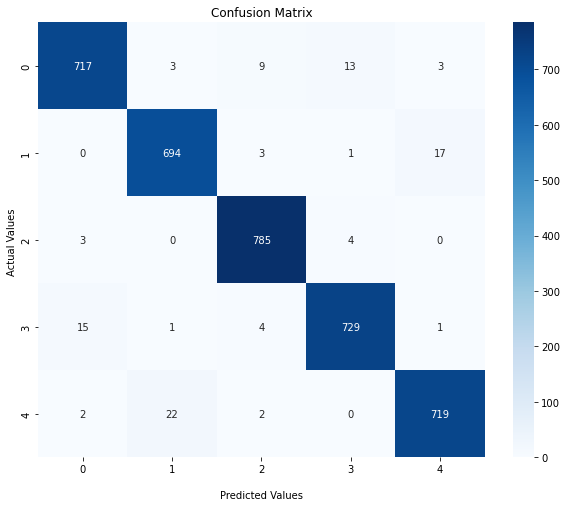

In [14]:
cm=confusion_matrix(test.classes,predictions)
plt.figure(figsize=[10,8])

ax = sns.heatmap(cm, annot=True,annot_kws={"size": 10}, fmt="d", cmap='Blues')

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


plt.show()

In [15]:
print(classification_report(test.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       745
           1       0.96      0.97      0.97       715
           2       0.98      0.99      0.98       792
           3       0.98      0.97      0.97       750
           4       0.97      0.97      0.97       745

    accuracy                           0.97      3747
   macro avg       0.97      0.97      0.97      3747
weighted avg       0.97      0.97      0.97      3747



In [16]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

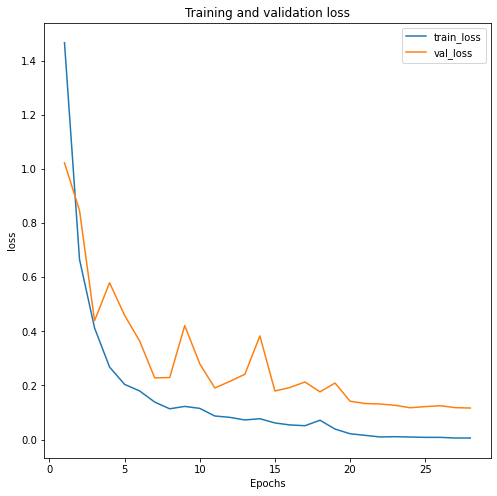

In [17]:
plt.figure(figsize=[8,8])
plot_metric(history,'loss')

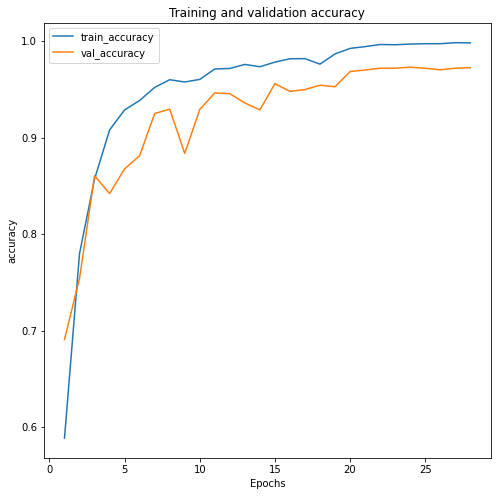

In [18]:
plt.figure(figsize=[8,8])
plot_metric(history,'accuracy')

# Prediction errors

In [233]:
error_indices=[]
true=test.classes
for i  in range(len(predictions)):
    if predictions[i]!=true[i]:
        error_indices.append(i)

In [234]:
paths_Front=glob.glob(r"C:\Users\USER\Desktop\Hamza's_Data\Hamza's_Data\test aug\Front view\*.jpg")

In [235]:
paths_Left=glob.glob(r"C:\Users\USER\Desktop\Hamza's_Data\Hamza's_Data\test aug\Left view\*.jpg")

In [236]:
paths_Rear=glob.glob(r"C:\Users\USER\Desktop\Hamza's_Data\Hamza's_Data\test aug\Rear view\*.jpg")

In [237]:
paths_Right=glob.glob(r"C:\Users\USER\Desktop\Hamza's_Data\Hamza's_Data\test aug\Right view\*.jpg")

In [238]:
allpaths=[]
allpaths.extend(paths_Right)
allpaths.extend(paths_Left)
allpaths.extend(paths_Rear)
allpaths.extend(paths_Right)

In [239]:
classes={0:'Front view',1: 'Left view' , 2:'Rear view',3: 'Right view'}

In [ ]:
for i in error_indices:
    img=cv2.imread(allpaths[i])
    cv2.imshow(f"True class ={classes[true[i]]} / predicted ={classes[predictions[i]]}",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

#  LIVE CAMERA

In [20]:
classes={0:'Front view', 1:"Left view", 2:"Not a car", 3:'Rear view', 5:'Right view'}

In [21]:
font = cv2.FONT_HERSHEY_SIMPLEX
org = (50, 50)
fontScale = 1
color = (255, 0, 0)
thickness = 2

In [ ]:
cap= cv2.VideoCapture(0)

In [ ]:
while True:
    ret, frame = cap.read()
    
    
    img = cv2.resize(frame, (224,224))  
    img=np.array(img)
    img= np.expand_dims(img,axis=0)
    
    y_pred= model.predict(img)
    index=np.argmax(y_pred[0])
    print(y_pred[0])
    
    if y_pred[0][index]>0.7:
            
        cv2.putText(frame,classes[index]+str(y_pred[0][index]), (50, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
    
    cv2.imshow('Frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
    